In [3]:
#Importo librerías necesarias
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

#Cuestiones previas:
###1. La forma de guardar la información de las masas es la siguiente:
+ Cada una tiene dos componentes: un vector $r$ (que contiene posición en $\hat{\textbf{i}}$ y $\hat{\textbf{j}}$) y un vector $v$ (que contiene velocidad en $\hat{\textbf{i}}$ y $\hat{\textbf{j}}$).
+ El array Y contiene la información de **todas** las masas en cuestión. El orden de la información contenida en este array es: [$r_1,v_1,r_2,v_2, \dots ,r_n,v_n$]. Definidos $r$ y $v$ como se explicó en el punto anterior.

###2. Se utilizó la siguiente fórmula para de interacción gravitacional (Asumiendo $G = 1$):

$$\\ m_i \dfrac{d^2x}{dt^2} = - \sum_{i \neq j} \dfrac{m_i m_j (x_i - x_j)}{r^3_{ij}}\\$$
$$i = 1, \dots , N$$

###3. Se utilizó el método de Runge-Kutta de orden 4 para resolver las ecuaciones diferenciales de movimiento. Recordando que este se basa en que:

$$\dfrac{d}{dt} Y(t) = f(Y)$$

###4. Todo lo aquí hecho se basa en la información tomada de las fuentes: [1](http://www14.in.tum.de/konferenzen/Jass05/courses/2/Lapshin/Lapshin_paper.pdf) y [2](http://radio.astro.gla.ac.uk/a1dynamics/pw/code/simple-3-body.py).

In [12]:
#Se define la función f(Y) y el método de Runge-Kutta basados en la explicación anterior y 
#en lo tomado del cuaderno de la clase de ODE
#https://github.com/ComputoCienciasUniandes/MetodosComputacionales/blob/master/slides/2015-V/10-ODE.ipynb

#Defino la velocidad del centro de masa
def vel_centr_mas(Y):
    vm = 0
    mass = 0
    for i in range(len(Y)):
        vm += Y[i]['m']*Y[i]['v']
        mass += Y[i]['m']
    return (vm/mass)

def F(Y):
    r = np.array([])
    for i in range(len(Y)):
        ractual = Y[i]['r']
        r = np.append(r,)

def f(Y):
    info = []
    for i in range(0,len(Y),2):
        v = 0
        for j in range(0,len(Y),2):
            if (i != j):
                v -= ((Y[i] - Y[j]) / norm(Y[i] - Y[j])**3)
        info.extend((Y[i+1],v))
    return(np.array(info))

def one_Kutta4_step(dt,Y):
    #Reseuvlo con Runge-Kutta orden 4
    K1 = dt*f(Y)
    K2 = dt*f(Y + (1/2.*K1))
    K3 = dt*f(Y + (1./2.*K2))
    K4 = dt*f(Y + K3)
    dy = 1/6.*K1 + 1/3.*K2 + 1/3.*K3 + 1/6.*K4
    #Asigno los valores nuevos
    Y += dy
    
def one_Kutta4_step1():
    global t
    global Deltat
    global Y
    K1 = f(Y)
    K2 = f(Y + Deltat*(1./2.*K1))
    K3 = f(Y + Deltat*(1./2.*K2))
    K4 = f(Y + Deltat*K3)
    Y+= Deltat * (1/6.*K1 + 1/3. * K2 + 1/3.*K3 + 1/6.*K4)
    t+= Deltat

def graficador(history,masa):
    if (masa == 0):
        plt.figure(figsize=(15,6))
        plt.title("Kutta Orden 4")
        plt.axis('equal')
        plt.xlim(-0.4,0.4)
        plt.ylim(-0.1,0.1)
        for i in range(0,len(Y),2):
            plt.scatter(history[:,i][:,0],history[:,i][:,1],s=1)
            plt.scatter(history[:,i][:,0][0],history[:,i][:,1][0],s=50)
        plt.show()
    else:
        plt.figure(figsize=(15,6))
        plt.title("Kutta Orden 4")
        #plt.axis('equal')
        plt.xlim(-0.4,0.4)
        plt.ylim(-0.1,0.1)
        plt.scatter(history[:,int(masa-1)][:,0],history[:,int(masa-1)][:,1],s=1)
        plt.scatter(history[:,int(masa-1)][:,0][0],history[:,int(masa-1)][:,1][0],s=50)
        plt.show()

def simulacion(numIter,dt,Y):
    history=np.array([Y])
    for iters in range(numIter):
        one_Kutta4_step(dt,Y)
        history=np.append(history,[Y],axis=0)
    return (history)

##Punto 1) 3-Coreografía

In [27]:
#Defino las ecuaciones iniciales
a = 0.24250109
b = -0.0607718825
c = 0.93240737
d = 0.86473146

#Se ordena la información de cada masa y la del total en Y basados en la explicación inicial.
r1 = np.array([a,b])
r2 = np.array([-a,-b])
r3 = np.array([0,0])

v1 = np.array([c,d])
v2 = np.array([c,d])
v3 = np.array([-2*c,-2*d])

#m1 = {'r':r1 , 'v':v1, 'm':1,}
#m2 = {'r':r2 , 'v':v2, 'm':1,}
#m3 = {'r':r3 , 'v':v3, 'm':1,}

#Y = np.array([m1,m2,m3])

Y = np.array([r1,v1,r2,v2,r3,v3])

#### Pruebas - ignorar -
#y1 = np.array([a,b,c,d])
#
#y2 = np.array([-a,-b,c,d])
#
#y3 = np.array([0,0,-2*c,-2*d])
#7
#Y = np.array([y1,y2,y3])

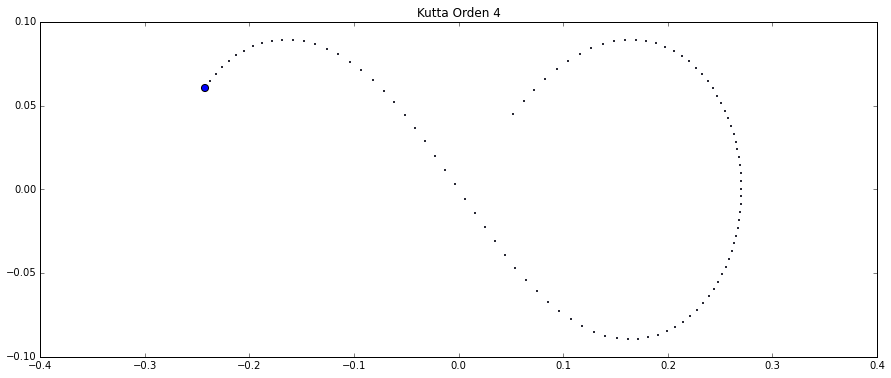

In [28]:
graficador(simulacion(100,0.0050,Y),masa=3)

(-0.1, 0.1)

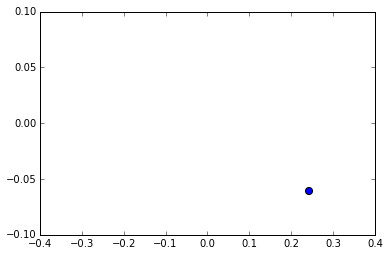

In [16]:
plt.scatter(r1[0],r1[1],s=50)
plt.xlim(-0.4,0.4)
plt.ylim(-0.1,0.1)

In [4]:
aaa = simulacion(100,0.0020,Y)#[:,0][:,0]

In [7]:
aaa[:,0][:,1][0]

-0.060771882499999999